# Cricket Data from 2008 to 2023

- The `cricket` dataset is a comprehensive collection of data from various cricket matches. It encompasses player performances, team statistics, match results, and other relevant attributes across different formats and seasons. This dataset provides valuable insights into player and team dynamics, performance trends, and statistical patterns in the game of cricket. It serves as a valuable resource for cricket enthusiasts, analysts, and researchers interested in studying the intricacies of cricket and its impact on the sport.

## Data Preparation and Cleaning

Well, let's begin with importing data and and perform some actions to clean data like finding if there is any missing values or any incorrect values or not 

Let's get started

### Importing libraries

In [34]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Loading Dataset

In [35]:
data = pd.read_csv('data/Cricket_data.csv') #choose the location of file as per your machine setup
data

,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,...,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
0,NaN,1370350,Chennai Super Kings v Gujarat Titans,CSK v GT,"Qualifier 1 (N), Indian Premier League at Chen...",CSK,GT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1370351,Lucknow Super Giants v Mumbai Indians,LSG v MI,"Eliminator (N), Indian Premier League at Chenn...",LSG,MI,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1370352,TBC v TBC,TBC v TBC,"Qualifier 2 (N), Indian Premier League at Ahme...",TBA,TBA,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1370353,TBC v TBC,TBC v TBC,"Final (N), Indian Premier League at Ahmedabad,...",TBA,TBA,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023.0,1359544,Royal Challengers Bangalore v Gujarat Titans,RCB v GT,"70th Match (N), Indian Premier League at Benga...",RCB,GT,GT,BOWL FIRST,197/5,...,"Virat Kohli (UKN),Faf du Plessis (UKN),Glenn M...","Wriddhiman Saha (WK),Shubman Gill (UKN),Vijay ...","Shubman Gill,Vijay Shankar","Noor Ahmad,Rashid Khan",21 May 2023 - night match (20-over match),Nitin Menon,Virender Sharma,Tapan Sharma,Javagal Srinath,VM Dhokre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,2008.0,336012,Royal Challengers Bangalore v Mumbai Indians,RCB v MI,"55th match (D/N), Indian Premier League at Ben...",RCB,MI,MI,BOWL FIRST,122/9,...,"Mark Boucher (BT),Shreevats Goswami (WK),Misba...","Sanath Jayasuriya (AR),Sachin Tendulkar (BT),R...","Sanath Jayasuriya,Sachin Tendulkar","Dilhara Fernando,Dwayne Smith",28 May 2008 - day/night match (20-over match),Billy Bowden,Arani Jayaprakash,Billy Doctrove,Sir Clive Lloyd,NaN
1028,2008.0,336019,Kings XI Punjab v Rajasthan Royals,KXIP v RR,"56th match (N), Indian Premier League at Mohal...",KXIP,RR,RR,BOWL FIRST,221/3,...,"Shaun Marsh (BT),James Hopes (AR),Yuvraj Singh...","Mohammad Kaif (BT),Niraj Patel (UKN),Younis Kh...","Niraj Patel,Yusuf Pathan","Shane Watson,Yusuf Pathan",28 May 2008 - night match (20-over match),Krishna Hariharan,Steve Davis,Daryl Harper,Srinivas Venkataraghavan,MS Mahal
1029,2008.0,336038,Delhi Daredevils v Rajasthan Royals,DC v RR,"1st Semi-Final (N), Indian Premier League at M...",DC,RR,DC,BOWL FIRST,192/9,...,"Gautam Gambhir (BT),Virender Sehwag (BT),Shikh...","Graeme Smith (BT),Swapnil Asnodkar (BT),Sohail...","Shane Watson,Yusuf Pathan","Shane Watson,Munaf Patel",30 May 2008 - night match (20-over match),Billy Bowden,Rudi Koertzen,Billy Doctrove,Javagal Srinath,NaN
1030,2008.0,336039,Chennai Super Kings v Kings XI Punjab,CSK v KXIP,"2nd Semi-Final (N), Indian Premier League at M...",CSK,KXIP,KXIP,BAT FIRST,112/8,...,"Parthiv Patel (WK),Vidyut Sivaramakrishnan (UK...","Shaun Marsh (BT),James Hopes (AR),Kumar Sangak...","Ramesh Powar,Wilkin Mota","Irfan Pathan,Vikram Singh",31 May 2008 - night match (20-over match),Asad Rauf,Daryl Harper,Krishna Hariharan,Srinivas Venkataraghavan,NaN


### Basic Information about Dataset

#### Shape of the data

In [36]:
data.shape

(1032, 43)

#### Info of the data

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            1027 non-null   float64
 1   id                1032 non-null   int64  
 2   name              1032 non-null   object 
 3   short_name        1032 non-null   object 
 4   description       1032 non-null   object 
 5   home_team         1032 non-null   object 
 6   away_team         1032 non-null   object 
 7   toss_won          1027 non-null   object 
 8   decision          1027 non-null   object 
 9   1st_inning_score  1019 non-null   object 
 10  2nd_inning_score  1017 non-null   object 
 11  winner            1031 non-null   object 
 12  result            1032 non-null   object 
 13  start_date        1032 non-null   object 
 14  end_date          1032 non-null   object 
 15  venue_id          1032 non-null   int64  
 16  venue_name        1032 non-null   object 


#### Description of the data

In [38]:
data.describe()

,season,id,venue_id,home_overs,home_runs,home_wickets,home_boundaries,away_overs,away_runs,away_wickets,away_boundaries
count,1027.000000,1.032000e+03,1.032000e+03,1019.000000,1019.000000,1019.000000,1019.000000,1017.000000,1017.000000,1017.000000,1017.000000
mean,2015.513145,8.665104e+05,1.255838e+05,19.089892,158.309127,5.791953,19.412169,19.082104,155.962635,5.950836,19.108161
std,4.628349,3.530627e+05,1.644463e+05,2.095061,31.816295,2.404542,5.850536,2.114934,31.334376,2.508164,5.683248
min,2008.000000,3.359820e+05,5.785100e+04,1.100000,2.000000,0.000000,0.000000,3.200000,41.000000,0.000000,3.000000
25%,2012.000000,5.483118e+05,5.799100e+04,19.200000,138.000000,4.000000,15.000000,19.200000,137.000000,4.000000,15.000000
50%,2015.000000,8.298080e+05,5.814200e+04,20.000000,160.000000,6.000000,19.000000,20.000000,158.000000,6.000000,19.000000
75%,2020.000000,1.216501e+06,5.908900e+04,20.000000,180.000000,8.000000,23.000000,20.000000,176.000000,8.000000,23.000000
max,2023.000000,1.370353e+06,1.070094e+06,20.000000,263.000000,10.000000,42.000000,20.000000,257.000000,10.000000,41.000000


#### Columns

In [39]:
data.columns

Index(['season', 'id', 'name', 'short_name', 'description', 'home_team',
       'away_team', 'toss_won', 'decision', '1st_inning_score',
       '2nd_inning_score', 'winner', 'result', 'start_date', 'end_date',
       'venue_id', 'venue_name', 'home_captain', 'away_captain', 'pom',
       'points', 'super_over', 'home_overs', 'home_runs', 'home_wickets',
       'home_boundaries', 'away_overs', 'away_runs', 'away_wickets',
       'away_boundaries', 'highlights', 'home_key_batsman', 'home_key_bowler',
       'home_playx1', 'away_playx1', 'away_key_batsman', 'away_key_bowler',
       'match_days', 'umpire1', 'umpire2', 'tv_umpire', 'referee',
       'reserve_umpire'],
      dtype='object')

### Removing unwanted columns

In [40]:
data.drop(columns=['description','1st_inning_score','2nd_inning_score','result','end_date','points','highlights','home_key_batsman', 'home_key_bowler',
       'home_playx1', 'away_playx1', 'away_key_batsman', 'away_key_bowler','umpire1', 'umpire2', 'tv_umpire', 'referee',
       'reserve_umpire','match_days'],inplace=True)

In [41]:
data.columns

Index(['season', 'id', 'name', 'short_name', 'home_team', 'away_team',
       'toss_won', 'decision', 'winner', 'start_date', 'venue_id',
       'venue_name', 'home_captain', 'away_captain', 'pom', 'super_over',
       'home_overs', 'home_runs', 'home_wickets', 'home_boundaries',
       'away_overs', 'away_runs', 'away_wickets', 'away_boundaries'],
      dtype='object')

In [42]:
data['season'].unique()

array([  nan, 2023., 2022., 2021., 2020., 2019., 2018., 2017., 2016.,
       2015., 2014., 2013., 2012., 2011., 2010., 2009., 2008.])

### Checking Missing Values

In [43]:
data.isna().sum().reset_index()

,index,0
0,season,5
1,id,0
2,name,0
3,short_name,0
4,home_team,0
5,away_team,0
6,toss_won,5
7,decision,5
8,winner,1
9,start_date,0


We have missing values in below columns
- `season` - 5
- `decision` - 5
- `winner` - 1
- `home_captain` - 5
- `away_captain` - 5
- `pom` - 17
- `super_over` - 5
- `home_overs` - 13
- `home_runs` - 13
- `home_wickets` - 13
- `home_boundaries` - 13
- `away_overs` - 15
- `away_runs` - 15
- `away_wickets` - 15
- `away_boundaries` - 15
- `match_days` - 5

Most of these columns have same number of missing values, this might be because these missing values are in same row, but we are not sure about this.

Let's fix them one by one starting from `season` column

### Fixing `season` column missing values

Since season is a categorical column so for this we are just droping missing values

In [44]:
data = data.dropna(subset=['season']).reset_index(drop=True)

#### Now let's check if our assumption was correct for missing values or not

In [45]:
data.isna().sum()

season              0
id                  0
name                0
short_name          0
home_team           0
away_team           0
toss_won            0
decision            0
winner              1
start_date          0
venue_id            0
venue_name          0
home_captain        0
away_captain        0
pom                12
super_over          0
home_overs          8
home_runs           8
home_wickets        8
home_boundaries     8
away_overs         10
away_runs          10
away_wickets       10
away_boundaries    10
dtype: int64

### Fixing `winner` column missing values

Since winner column is a categorical column so for this we are just setting `No Player` for missing values

In [46]:
data['winner'].fillna('No Player',inplace=True)

### Fixing `pom` column missing values

Since pom column is a categorical column so for this we are just setting `No Player` for missing values

In [47]:
data['pom'].fillna('No Player',inplace=True)

### Fixing `home_overs`, `home_runs`, `home_wickets`, `home_boundaries` column missing values

Since these emply cells are in same row because to no match conducted so for this we are just setting missing values to `0`

In [48]:
data['home_overs'].fillna(0,inplace=True)
data['home_runs'].fillna(0,inplace=True)
data['home_wickets'].fillna(0,inplace=True)
data['home_boundaries'].fillna(0,inplace=True)

### Fixing `away_overs`, `away_runs`, `away_wickets`, `away_boundaries` column missing values

Since these emply cells are in same row because to no match conducted so for this we are just setting missing values to `0`

In [49]:
data['away_overs'].fillna(0,inplace=True)
data['away_runs'].fillna(0,inplace=True)
data['away_wickets'].fillna(0,inplace=True)
data['away_boundaries'].fillna(0,inplace=True)

### Verifying mising values

In [50]:
data.isna().sum()

season             0
id                 0
name               0
short_name         0
home_team          0
away_team          0
toss_won           0
decision           0
winner             0
start_date         0
venue_id           0
venue_name         0
home_captain       0
away_captain       0
pom                0
super_over         0
home_overs         0
home_runs          0
home_wickets       0
home_boundaries    0
away_overs         0
away_runs          0
away_wickets       0
away_boundaries    0
dtype: int64

### Changing Data type of columns

In [51]:
data['start_date'] = pd.to_datetime(data['start_date'])
data['super_over'] = data['super_over'].astype(bool)
data['home_runs'] = data['home_runs'].astype('int16')
data['home_wickets'] = data['home_wickets'].astype('int16')
data['home_boundaries'] = data['home_boundaries'].astype('int16')
data['away_runs'] = data['away_runs'].astype('int16')
data['away_wickets'] = data['away_wickets'].astype('int16')
data['away_boundaries'] = data['away_boundaries'].astype('int16')

### Creating `city` column using `venue_name` column

In [52]:
data['city'] = ''
for i in range(data.shape[0]):
    data.loc[i, 'city'] = data['venue_name'].str.split(', ')[i][-1]

### Rearranging columns

In [53]:
data = data[['season', 'id', 'name', 'short_name', 'home_team', 'away_team',
       'toss_won', 'decision', 'winner', 'start_date', 'venue_id',
       'venue_name','city', 'home_captain', 'away_captain', 'pom', 'super_over',
       'home_overs', 'home_runs', 'home_wickets', 'home_boundaries',
       'away_overs', 'away_runs', 'away_wickets', 'away_boundaries']]

### Preview of Data

In [54]:
data.head()

,season,id,name,short_name,home_team,away_team,toss_won,decision,winner,start_date,...,pom,super_over,home_overs,home_runs,home_wickets,home_boundaries,away_overs,away_runs,away_wickets,away_boundaries
0,2023.0,1359544,Royal Challengers Bangalore v Gujarat Titans,RCB v GT,RCB,GT,GT,BOWL FIRST,GT,2023-05-21 14:00:00+00:00,...,Shubman Gill,False,20.0,197,5,28,19.1,198,4,25
1,2023.0,1359543,Mumbai Indians v Sunrisers Hyderabad,MI v SRH,MI,SRH,MI,BOWL FIRST,MI,2023-05-21 10:00:00+00:00,...,Cameron Green,False,18.0,201,2,31,20.0,200,5,27
2,2023.0,1359542,Kolkata Knight Riders v Lucknow Super Giants,KKR v LSG,KKR,LSG,KKR,BOWL FIRST,LSG,2023-05-20 14:00:00+00:00,...,Nicholas Pooran,False,20.0,175,7,24,20.0,176,8,22
3,2023.0,1359541,Delhi Capitals v Chennai Super Kings,DC v CSK,DC,CSK,CSK,BAT FIRST,CSK,2023-05-20 10:00:00+00:00,...,Ruturaj Gaikwad,False,20.0,146,9,17,20.0,223,3,31
4,2023.0,1359540,Punjab Kings v Rajasthan Royals,PBKS v RR,PBKS,RR,RR,BOWL FIRST,RR,2023-05-19 14:00:00+00:00,...,Devdutt Padikkal,False,20.0,187,5,26,19.4,189,6,27


For now our data is all set we can now perform Analysis and Visualizations, if more data cleaning required we will perform that later

## Exploratory Analysis and Visualization

In this section we will perform some Analysis and present them in form of Graphs or you can say that Visuals



Let's begin by importing `matplotlib.pyplot` and `seaborn`.

In [55]:
data['season'].unique()

array([2023., 2022., 2021., 2020., 2019., 2018., 2017., 2016., 2015.,
       2014., 2013., 2012., 2011., 2010., 2009., 2008.])

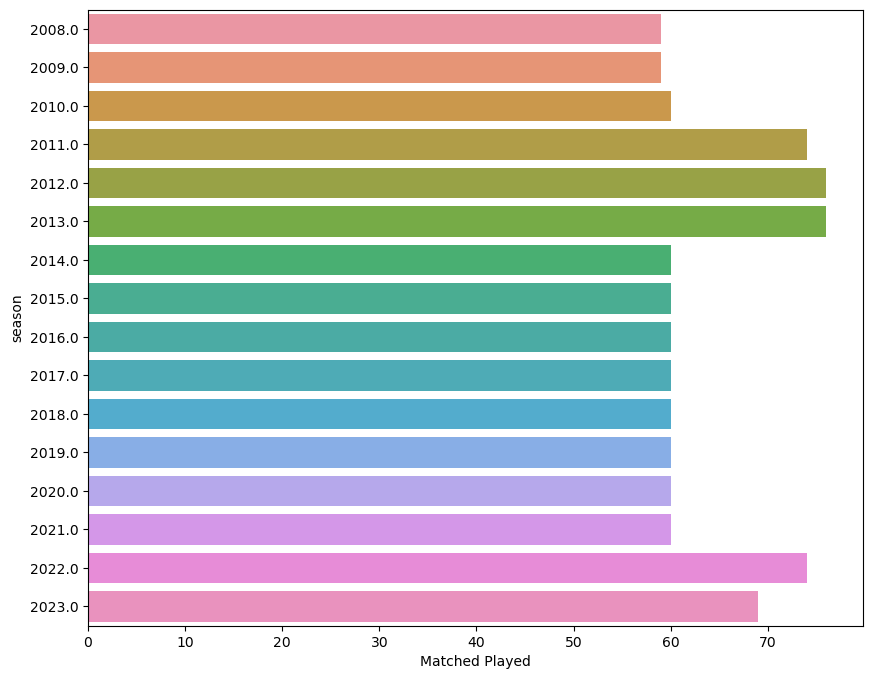

In [56]:
#Seasonwise IPL matches

plt.figure(figsize=(10,8))
data2=data.groupby(['id','season']).count().index.droplevel(level=0).value_counts().sort_index()
sns.barplot(y=data2.index,x=data2,orient='h')
plt.xlabel("Matched Played")
plt.ylabel("season")
plt.show()

In [57]:
result=data.groupby(['id','venue_name']).count().index.droplevel(level=0).value_counts().sort_index()
result

venue_name
Arun Jaitley Stadium, Delhi                                               86
Barabati Stadium, Cuttack                                                  7
Barsapara Cricket Stadium, Guwahati                                        2
Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow      6
Brabourne Stadium, Mumbai                                                 27
Buffalo Park, East London                                                  3
Diamond Oval, Kimberley                                                    3
Dr DY Patil Sports Academy, Mumbai                                        17
Dr DY Patil Sports Academy, Navi Mumbai                                   20
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam        13
Dubai International Cricket Stadium                                       46
Eden Gardens, Kolkata                                                     88
Green Park, Kanpur                                               

In [58]:
result=data.groupby(['id','city']).count().index.droplevel(level=0).value_counts().sort_index()
result

city
Abu Dhabi                               37
Ahmedabad                               26
Bengaluru                               90
Bloemfontein                             2
Cape Town                                8
Centurion                               12
Chandigarh                              61
Chennai                                 74
Cuttack                                  7
Delhi                                   86
Dharamsala                              11
Dubai International Cricket Stadium     46
Durban                                  16
East London                              3
Guwahati                                 2
Hyderabad                               71
Indore                                   9
Jaipur                                  52
Johannesburg                             8
Kanpur                                   4
Kimberley                                3
Kochi                                    5
Kolkata                                 88
Luckno

In [59]:
#IPL matches played by each team
home_team_data=data['home_team'].value_counts().sort_values(ascending=False)
home_team_data

home_team
RCB      125
DC       123
CSK      123
SRH      122
MI       120
KKR      115
RR        96
KXIP      93
PWI       23
PBKS      21
GT        16
GL        15
LSG       14
RPS       14
Kochi      7
Name: count, dtype: int64

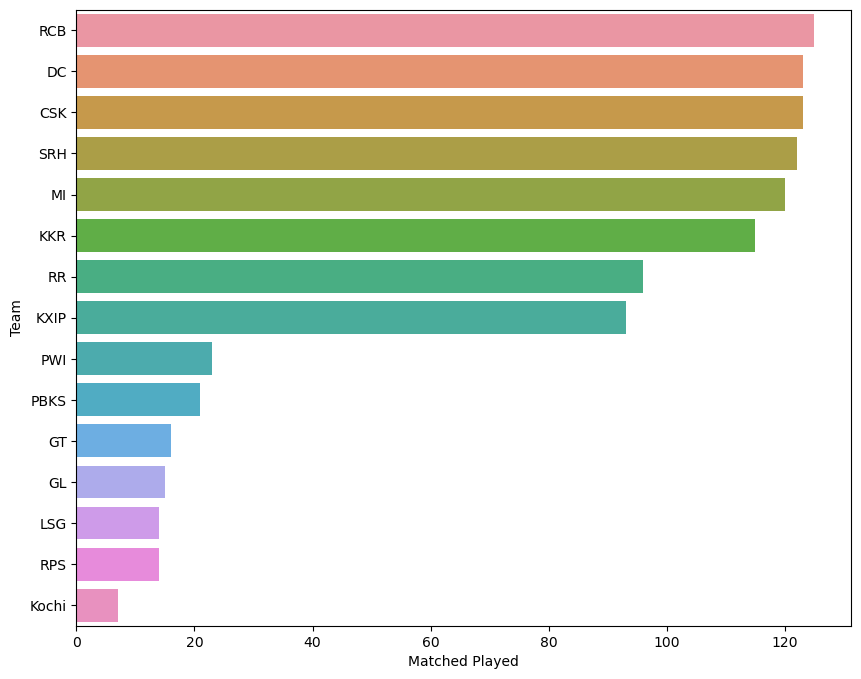

In [60]:
plt.figure(figsize=(10,8))
sns.barplot(y=home_team_data.index,x=home_team_data,orient='h')
plt.xlabel("Matched Played")
plt.ylabel("Team")
plt.show()

In [61]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Season

Let's explore `season` column and plot a bar chart to get some information

In [62]:
no_of_matches = data['season'].value_counts().sort_index()
no_of_matches

season
2008.0    59
2009.0    59
2010.0    60
2011.0    74
2012.0    76
2013.0    76
2014.0    60
2015.0    60
2016.0    60
2017.0    60
2018.0    60
2019.0    60
2020.0    60
2021.0    60
2022.0    74
2023.0    69
Name: count, dtype: int64

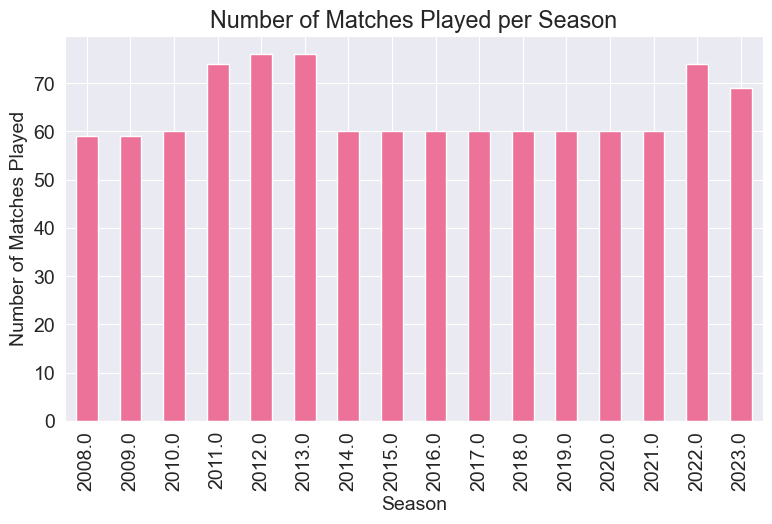

In [63]:
no_of_matches.plot(kind='bar' ,color='#ed7299')
plt.title('Number of Matches Played per Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches Played')
plt.show()

So by this graph we get an idea the number of matches played per season

Also, we can conclude that:
- In seasons `2011`, `2012`, `2013`, `2022`, `2023` , number of matches played are more than the usual range 
- Rest in almost every season total matches played are nearly equalt to `60`

### toss_won

Let's explore `toss_won` column and plot a Horizontal bar chart to get some information

In [64]:
toss_won = data['toss_won'].value_counts().sort_values(ascending=True)
toss_won

toss_won
PBKS         5
no toss      7
Kochi        8
LSG         10
RPS         13
GL          15
GT          18
PWI         20
KXIP        94
RR         109
RCB        114
CSK        117
KKR        119
DC         123
SRH        124
MI         131
Name: count, dtype: int64

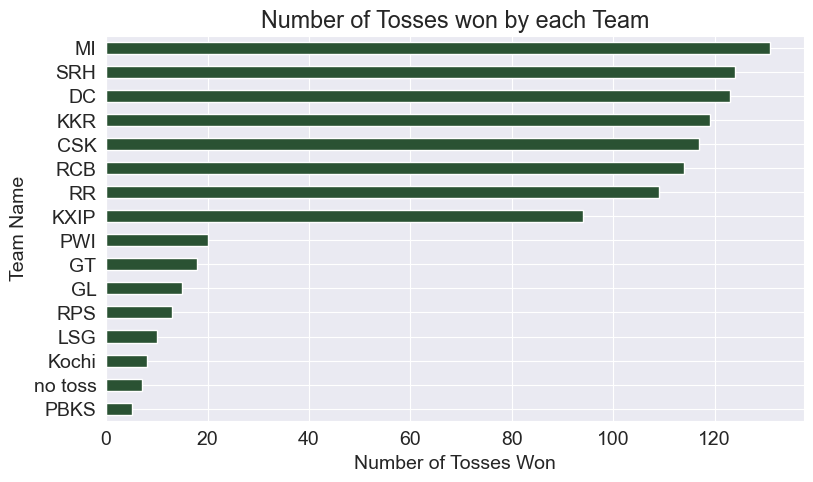

In [65]:
toss_won.plot(kind='barh',color='#2a5233')
plt.title('Number of Tosses won by each Team')
plt.xlabel('Number of Tosses Won')
plt.ylabel('Team Name')
plt.show()

By this above graph we can easily conclude that:

- Almost `50%` teams of the total teams whose toss winning chances are much higer than `50%` 
- Toss winning chances of `MI (Mumbai Indians)` are highest than other teams
- Toss winning chances of `PBKS (Punjab Kings)` are lowest than other teams

### Decision

Let's explore `decision` column and plot a pie chart to get some information

In [66]:
bowl_first = data['decision'].value_counts()[0]
bat_first = data['decision'].value_counts()[1]
print(bowl_first)
print(bat_first)

649
371


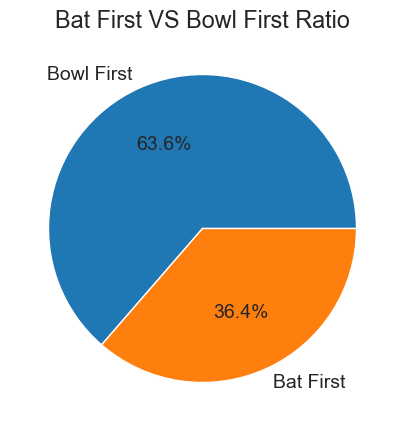

In [67]:
plt.pie([bowl_first,bat_first],labels=['Bowl First','Bat First'],autopct='%1.1f%%')
plt.title('Bat First VS Bowl First Ratio')
plt.show()

According to this pie chart we can conclude that:

- About `63.3%` of the teams prefer to choose `bowl` first
- About `36.4%` of the teams prefer to choose `bat` first

### home_team VS away_team

Let's explore `home_team`, `away_team` column and plot a scatter plot to get some information

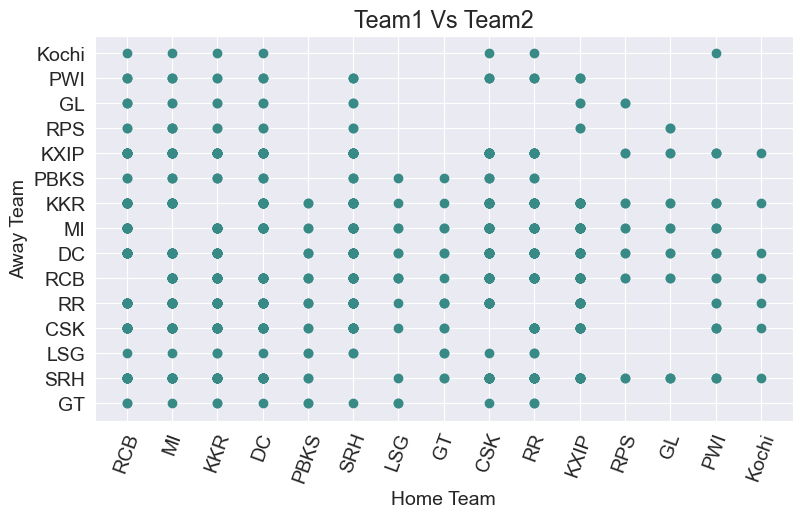

In [68]:
plt.scatter(x=data['home_team'],y=data['away_team'],color='#388a86')
plt.xticks(rotation=70)
plt.title('Team1 Vs Team2')
plt.xlabel('Home Team')
plt.ylabel('Away Team')
plt.show()

By this above graphs we can conclude that:

- Only `RCB`, `MI`, `KKR` and `DC` played matches with all other teams
- Rest of the teams haven't played with atleast `1` other team

## Asking and Answering Questions

In this section we will answering some of the questions regarding this dataset of `Cricket` 



### Q1: What are the percentage of winning a match if we won toss

In [70]:
success = data[data['toss_won'] == data['winner']].shape[0]
failure = data[data['toss_won'] != data['winner']].shape[0]

print(success)
print(failure)

total_matches = success + failure

winning_perc = round(success/total_matches*100,2)
failure_perc = round(failure/total_matches*100,2)

print('Winning perc:', winning_perc)
print('Loosing perc:', failure_perc)

522
505
Winning perc: 50.83
Loosing perc: 49.17


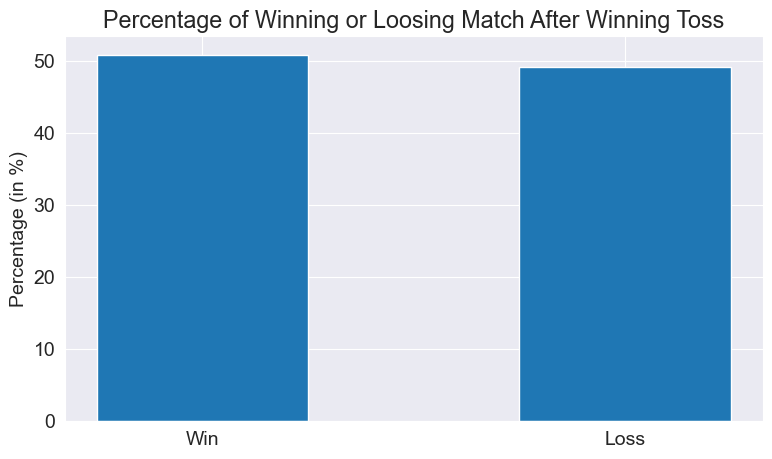

In [71]:
plt.bar(['Win','Loss'], [winning_perc,failure_perc],width=0.5)
plt.ylabel("Percentage (in %)")
plt.title("Percentage of Winning or Loosing Match After Winning Toss")
plt.show()

Let's understand this graph:
1. This graph represents `Winning` and `Loosing` percentage of a team after `Winning` a toss
1. By this graph we can say that:
    - It actually depends on luck
    - As both are of about same size
    - But `Win` percentage is slightly higher then `Loss`

### Q2: What are the total number of boundries by home team and away team per season

In [72]:
boundries = data.groupby('season')[['home_boundaries','away_boundaries']].sum()
boundries

,home_boundaries,away_boundaries
season,,
2008.0,1157,1171
2009.0,922,905
2010.0,1160,1124
2011.0,1292,1256
2012.0,1302,1338
2013.0,1422,1303
2014.0,1169,1107
2015.0,1157,1142
2016.0,1144,1126


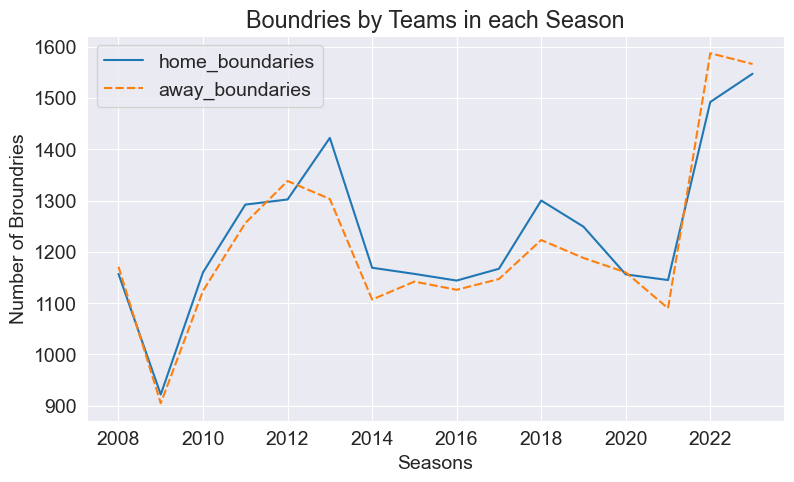

In [73]:
#boundries = data.groupby('season')[['home_boundaries','away_boundaries']].sum()
#boundries
sns.lineplot(boundries)
plt.title('Boundries by Teams in each Season')
plt.xlabel('Seasons')
plt.ylabel('Number of Broundries')
plt.show()

Let's understand this graph:
1. This graph represents number of `boundries` made by `home` team and `away` team per `season`
1. By this graph we can say that:
    - There is no major jump between `home_boundries` and `away_boundries`.
    - As in each season both teams made almost same number of `boundries`.
    - In season `2009` least number of boundries are made by both teams.
    - `away_team` made highest boundries in season `2022` while `home_team` made highest in season `2023`

### Q3: How many super over occured per season

In [74]:
super_overs = data.groupby('season')['super_over'].sum()
super_df = super_overs.reset_index()
ans = (super_df['super_over'] !=0).sum()

print('Total super overs occured in entire cricket period =',ans)

Total super overs occured in entire cricket period = 7


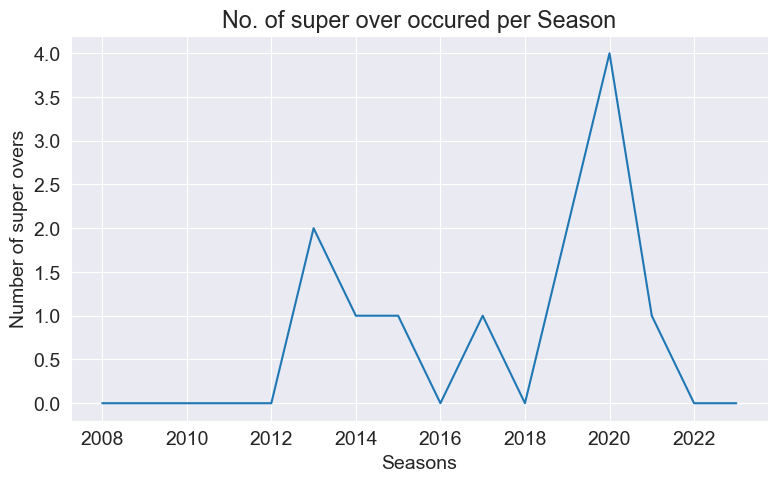

In [75]:
plt.plot(super_overs)
plt.title('No. of super over occured per Season')
plt.xlabel('Seasons')
plt.ylabel('Number of super overs')
plt.show()

Let's understand this graph:
1. This graph represents number of `super over occured` per `season`
1. By this graph we can say that:
    - In total `7` super over has occured in seasons from `2008` to `2023`
    - Seasons with `0` super overs are `2008`, `2009`, `2010`, `2011`, `2012`, `2016`, `2018`, `2022` and `2023`.
    - Highest super overs occured in season `2020` and i.e. `4`

### Q4:  Top 10 stadium with most number of matches played

In [76]:
stadiums = data['venue_name']
stadiums = stadiums.value_counts()
stadiums = stadiums.sort_values(ascending=False)
stadiums = stadiums.head(10)

stadiums

venue_name
Wankhede Stadium, Mumbai                                            111
M.Chinnaswamy Stadium, Bengaluru                                     90
Eden Gardens, Kolkata                                                88
Arun Jaitley Stadium, Delhi                                          86
MA Chidambaram Stadium, Chepauk, Chennai                             74
Rajiv Gandhi International Stadium, Uppal, Hyderabad                 71
Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh     61
Sawai Mansingh Stadium, Jaipur                                       52
Maharashtra Cricket Association Stadium, Pune                        51
Dubai International Cricket Stadium                                  46
Name: count, dtype: int64

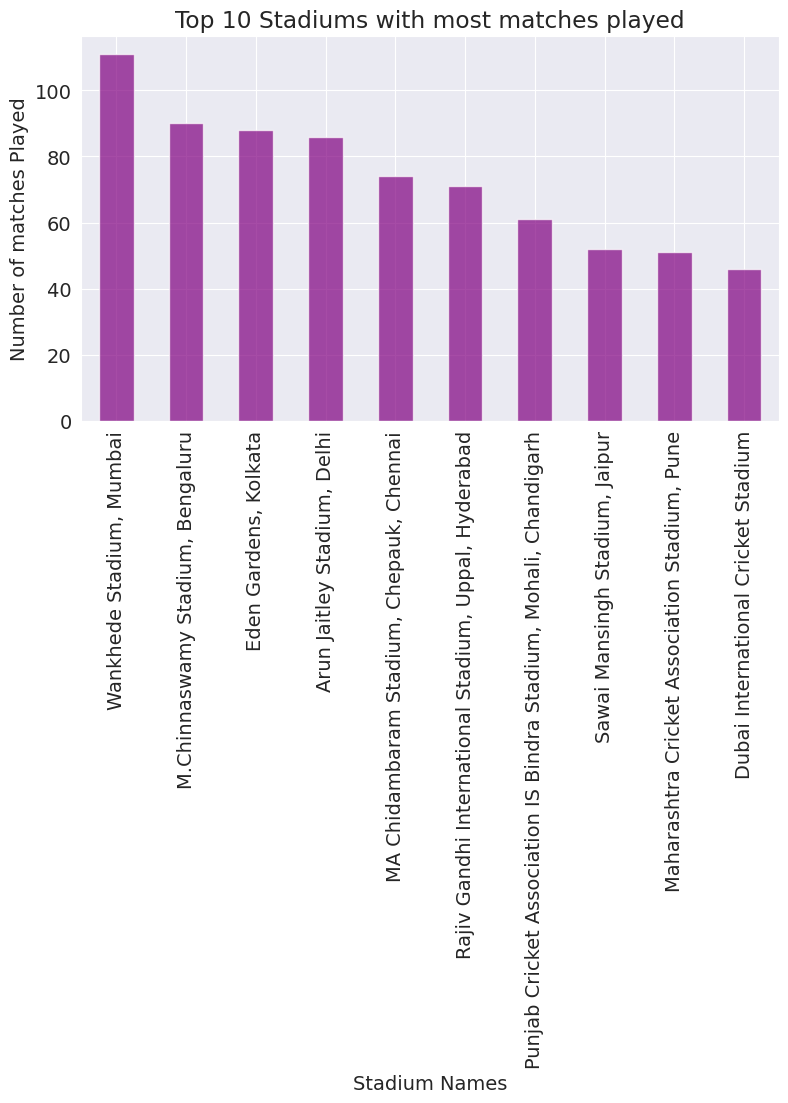

In [36]:
stadiums.plot(kind='bar',color='purple',alpha=0.7)
plt.title('Top 10 Stadiums with most matches played')
plt.xlabel('Stadium Names')
plt.ylabel('Number of matches Played')
plt.show()

By this graph we get an idea that:
- In `Wankhede Stadium, Mumbai` stadium most highest number of matches are played
- There is a large difference between `1st` and `10th` stadium in number of matches played

### Q5: Which team looses most number of wickets in entire dataset (`home_team` or `away_team`)

In [77]:
home_wick = data['home_wickets'].sum()
away_wick = data['away_wickets'].sum()

print(home_wick)
print(away_wick)

if home_wick > away_wick:
    print('Home Team looses more wickets i.e.', home_wick)
elif away_wick > home_wick:
    print('Away Team looses more wickets i.e.', away_wick)
else:
    print('Both team looses same number of wickets i.e.', home_wick)

5902
6052
Away Team looses more wickets i.e. 6052


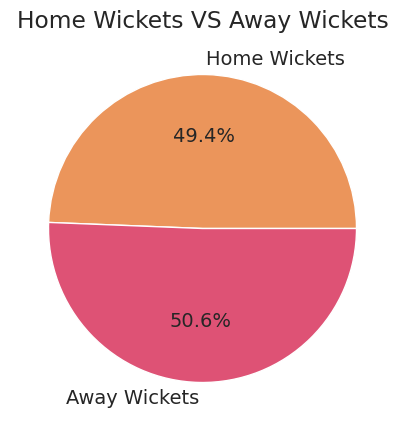

In [38]:
plt.pie([home_wick,away_wick],labels=['Home Wickets','Away Wickets'],autopct='%1.1f%%',colors=['#eb955b','#de5275'])
plt.title('Home Wickets VS Away Wickets')
plt.show()

According to this pie chart we can conclude that:

- About `49.4%` wickets lost by `Home Team`
- About `50.6%` whickets lost by `Away Team`
- While both percentage are nearly tends to same but yeah there is a difference

## Inferences and Conclusion

After analyzing this `Cricket` data we got to know about various information like in which season which team scored most runs and if we won toss is there any change we will win match also and much more

**Inferences**
- Examining team win-loss records and their performance in various seasons can highlight the most successful IPL teams
- Studying the performance of teams on their home grounds can help understand the impact of home advantage in the IPL.
- Identifying teams that have benefited from specific players' contributions can shed light on the significance of player-team dynamics.

**Conclusions**
- Some teams have consistently performed well in the IPL, evident from their high win-loss records and impressive average runs scored and conceded.
- The outcome of the toss does not significantly influence the overall result of IPL matches.
- The coin toss does not seem to play a decisive role in determining the winner, indicating that teams can succeed regardless of winning or losing the toss.

        home_runs  away_runs
season                      
2008.0       8999       8927
2009.0       8204       8107
2010.0       9453       9390
2011.0      10721      10421
2012.0      11175      11289
2013.0      11538      11003
2014.0       9611       9298
2015.0       9316       9016
2016.0       9524       9338
2017.0       9410       9359
2018.0      10172       9729
2019.0       9825       9575
2020.0       9777       9575
2021.0       9502       9120
2022.0      12046      12349
2023.0      12044      12118


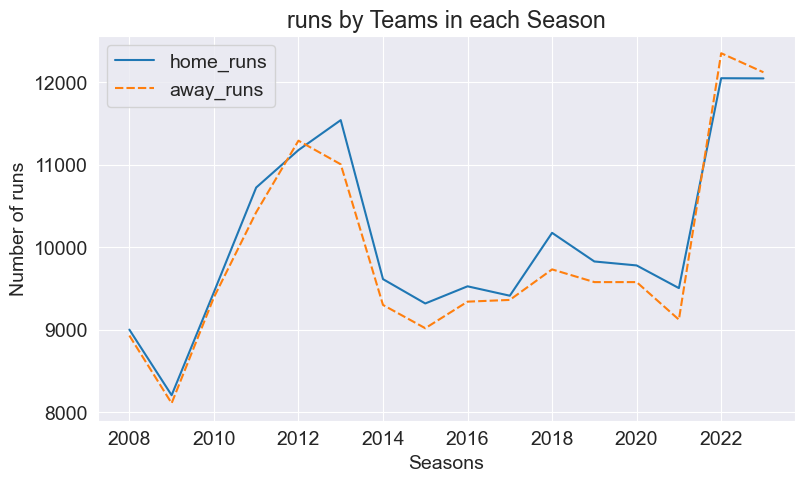

In [78]:
runs = data.groupby('season')[['home_runs','away_runs']].sum()
print(runs)

sns.lineplot(runs)
plt.title('runs by Teams in each Season')
plt.xlabel('Seasons')
plt.ylabel('Number of runs')
plt.show()